In [1]:
#celula 01
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.impute import SimpleImputer
import glob

# Configuração do Seaborn
sns.set(style="whitegrid")

In [2]:
# celula 02
# Usando raw string para corrigir o caminho do arquivo
example_file = r'C:\Users\vfanj\Documents\FIAP_POS_ML\Fase03_Tech_Challenge\bovespa-data-analysis\bovespa-data-analysis\data_pipeline\bovespa/IBOVDia_28-03-25.csv'

# Carregar e mostrar as primeiras linhas de um arquivo CSV específico
sample_data = pd.read_csv(example_file, delimiter=';', nrows=5)
print(sample_data.head())
print(sample_data.columns)


         date                        setor codigo       acao        tipo  \
0  28/03/2025   Bens Indls / Máqs e Equips  WEGE3        WEG  ON  EJ  NM   
1  28/03/2025  Bens Indls / Mat Transporte  EMBR3    EMBRAER  ON      NM   
2  28/03/2025  Bens Indls / Mat Transporte  POMO4  MARCOPOLO  PN      N2   
3  28/03/2025        Bens Indls/Transporte  AZUL4       AZUL  PN      N2   
4  28/03/2025        Bens Indls/Transporte  CCRO3     CCR SA  ON      NM   

   qtde_teorica  part_percent  part_acum_percent  
0  1.243178e+09         2.699              2.699  
1  7.346318e+08         2.349              2.557  
2  6.663784e+08         0.208              2.557  
3  3.268720e+08         0.054              2.131  
4  9.919209e+08         0.558              2.131  
Index(['date', 'setor', 'codigo', 'acao', 'tipo', 'qtde_teorica',
       'part_percent', 'part_acum_percent'],
      dtype='object')


In [3]:
# celula 03

import glob

# Use uma raw string e verifique o uso de barras
file_path_pattern = r'C:\Users\vfanj\Documents\FIAP_POS_ML\Fase03_Tech_Challenge\bovespa-data-analysis\bovespa-data-analysis\data_pipeline\bovespa\*.csv'

# Verificar quais arquivos são encontrados
found_files = glob.glob(file_path_pattern)
print("Arquivos encontrados:", found_files)

# Se arquivos forem encontrados, tente carregar o primeiro
if found_files:
    sample_data = pd.read_csv(found_files[0], delimiter=';', nrows=5)
    print("Dados do arquivo:", sample_data.head())
    print("Colunas disponíveis:", sample_data.columns)
else:
    print("Nenhum arquivo encontrado. Verifique o caminho.")


Arquivos encontrados: ['C:\\Users\\vfanj\\Documents\\FIAP_POS_ML\\Fase03_Tech_Challenge\\bovespa-data-analysis\\bovespa-data-analysis\\data_pipeline\\bovespa\\IBOVDia_18-03-25.csv', 'C:\\Users\\vfanj\\Documents\\FIAP_POS_ML\\Fase03_Tech_Challenge\\bovespa-data-analysis\\bovespa-data-analysis\\data_pipeline\\bovespa\\IBOVDia_20-03-25.csv', 'C:\\Users\\vfanj\\Documents\\FIAP_POS_ML\\Fase03_Tech_Challenge\\bovespa-data-analysis\\bovespa-data-analysis\\data_pipeline\\bovespa\\IBOVDia_27-03-25.csv', 'C:\\Users\\vfanj\\Documents\\FIAP_POS_ML\\Fase03_Tech_Challenge\\bovespa-data-analysis\\bovespa-data-analysis\\data_pipeline\\bovespa\\IBOVDia_28-03-25.csv']
Dados do arquivo:          date                        setor codigo       acao        tipo  \
0  18/03/2025   Bens Indls / Máqs e Equips  WEGE3        WEG  ON      NM   
1  18/03/2025  Bens Indls / Mat Transporte  EMBR3    EMBRAER  ON      NM   
2  18/03/2025  Bens Indls / Mat Transporte  POMO4  MARCOPOLO  PN      N2   
3  18/03/2025      

In [5]:
# Celula 05 de Tratamento Inicial de Date
import pandas as pd
import glob

def process_dates(df):
    # Convertendo 'date' para datetime usando o formato 'DD/MM/YYYY'
    df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y', errors='coerce')

    # Checando se há falhas na conversão
    if df['date'].isna().any():
        print("Falha na conversão de algumas datas.")

    # Extrair componentes da data
    df['ano'] = df['date'].dt.year
    df['mes'] = df['date'].dt.month
    df['dia'] = df['date'].dt.day
    df['dia_semana'] = df['date'].dt.dayofweek
    return df

def load_and_process_data(file_path_pattern):
    all_files = glob.glob(file_path_pattern)
    df_list = []

    for file in all_files:
        df = pd.read_csv(file, delimiter=';')
        df = process_dates(df)
        df_list.append(df)

    # Concatenar todos os DataFrames processados em um único DataFrame
    if df_list:
        data = pd.concat(df_list, ignore_index=True)
        return data
    else:
        return pd.DataFrame()  # Retorna um DataFrame vazio se não houver dados

# Caminho correto para os arquivos CSV
file_path_pattern = r'C:\Users\vfanj\Documents\FIAP_POS_ML\Fase03_Tech_Challenge\bovespa-data-analysis\bovespa-data-analysis\data_pipeline\bovespa\*.csv'
data = load_and_process_data(file_path_pattern)

print("Dados consolidados:", data.head())
print("Colunas disponíveis:", data.columns)




Dados consolidados:         date                        setor codigo       acao        tipo  \
0 2025-03-18   Bens Indls / Máqs e Equips  WEGE3        WEG  ON      NM   
1 2025-03-18  Bens Indls / Mat Transporte  EMBR3    EMBRAER  ON      NM   
2 2025-03-18  Bens Indls / Mat Transporte  POMO4  MARCOPOLO  PN      N2   
3 2025-03-18        Bens Indls/Transporte  AZUL4       AZUL  PN      N2   
4 2025-03-18        Bens Indls/Transporte  CCRO3     CCR SA  ON      NM   

   qtde_teorica  part_percent  part_acum_percent   ano  mes  dia  dia_semana  
0  1.243178e+09         2.819              2.819  2025    3   18           1  
1  7.346318e+08         2.706              2.925  2025    3   18           1  
2  6.663784e+08         0.219              2.925  2025    3   18           1  
3  3.268720e+08         0.059              2.227  2025    3   18           1  
4  9.919209e+08         0.571              2.227  2025    3   18           1  
Colunas disponíveis: Index(['date', 'setor', 'codigo', 

In [6]:
def load_data(file_path_pattern):
    all_files = glob.glob(file_path_pattern)
    df_list = []
    for file in all_files:
        df = pd.read_csv(file, delimiter=';')
        df_list.append(df)
    data = pd.concat(df_list, ignore_index=True)
    return data

# Caminho correto para os arquivos CSV
file_path_pattern = r'C:\Users\vfanj\Documents\FIAP_POS_ML\Fase03_Tech_Challenge\bovespa-data-analysis\bovespa-data-analysis\data_pipeline\bovespa\*.csv'
data = load_data(file_path_pattern)

print("Colunas disponíveis imediatamente após o carregamento:", data.columns)
print(data.head())  # Mostra as primeiras linhas para verificar as colunas de data


Colunas disponíveis imediatamente após o carregamento: Index(['date', 'setor', 'codigo', 'acao', 'tipo', 'qtde_teorica',
       'part_percent', 'part_acum_percent'],
      dtype='object')
         date                        setor codigo       acao        tipo  \
0  18/03/2025   Bens Indls / Máqs e Equips  WEGE3        WEG  ON      NM   
1  18/03/2025  Bens Indls / Mat Transporte  EMBR3    EMBRAER  ON      NM   
2  18/03/2025  Bens Indls / Mat Transporte  POMO4  MARCOPOLO  PN      N2   
3  18/03/2025        Bens Indls/Transporte  AZUL4       AZUL  PN      N2   
4  18/03/2025        Bens Indls/Transporte  CCRO3     CCR SA  ON      NM   

   qtde_teorica  part_percent  part_acum_percent  
0  1.243178e+09         2.819              2.819  
1  7.346318e+08         2.706              2.925  
2  6.663784e+08         0.219              2.925  
3  3.268720e+08         0.059              2.227  
4  9.919209e+08         0.571              2.227  


In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import pandas as pd

def preprocess_data(data):
    # Garantir que 'date' está no formato datetime
    data['date'] = pd.to_datetime(data['date'], errors='coerce')
    
    # Extrair ano, mês, dia e dia da semana
    data['ano'] = data['date'].dt.year
    data['mes'] = data['date'].dt.month
    data['dia'] = data['date'].dt.day
    data['dia_semana'] = data['date'].dt.weekday
    
    # Preservar colunas de data
    date_columns = data[['date', 'ano', 'mes', 'dia', 'dia_semana']]
    
    # Codificar 'codigo' com Label Encoder, preservando o original para rastreabilidade
    le = LabelEncoder()
    data['codigo_encoded'] = le.fit_transform(data['codigo'])
    
    # Identificar colunas categóricas e numéricas
    categorical_cols = data.select_dtypes(include=['object']).columns.difference(['codigo', 'date'])
    numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()

    # Codificar variáveis categóricas exceto 'codigo'
    data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

    # Remover colunas completamente nulas e aquelas que foram substituídas por dummies
    data = data.dropna(axis=1, how='all')

    # Preencher valores ausentes com a média nas colunas numéricas
    imputer = SimpleImputer(strategy='mean')
    data[numeric_cols] = imputer.fit_transform(data[numeric_cols])

    # Reconectar as colunas de data preservadas
    data = pd.concat([date_columns, data], axis=1)

    return data

# Testar a função ajustada
data = preprocess_data(data)
print("Dados após o pré-processamento:", data.head())
print("Colunas disponíveis:", data.columns)


Dados após o pré-processamento:         date   ano  mes  dia  dia_semana       date codigo  qtde_teorica  \
0 2025-03-18  2025    3   18           1 2025-03-18  WEGE3  1.243178e+09   
1 2025-03-18  2025    3   18           1 2025-03-18  EMBR3  7.346318e+08   
2 2025-03-18  2025    3   18           1 2025-03-18  POMO4  6.663784e+08   
3 2025-03-18  2025    3   18           1 2025-03-18  AZUL4  3.268720e+08   
4 2025-03-18  2025    3   18           1 2025-03-18  CCRO3  9.919209e+08   

   part_percent  part_acum_percent  ...  tipo_PN  ATZ N2  tipo_PN  EB  N1  \
0         2.819              2.819  ...            False            False   
1         2.706              2.925  ...            False            False   
2         0.219              2.925  ...            False            False   
3         0.059              2.227  ...            False            False   
4         0.571              2.227  ...            False            False   

   tipo_PN  EJ  N1  tipo_PNA     N1  tipo_PNA AT

C:\Users\vfanj\AppData\Local\Temp\ipykernel_1384\2575320816.py:7: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['date'] = pd.to_datetime(data['date'], errors='coerce')


C:\Users\vfanj\AppData\Local\Temp\ipykernel_1384\2575320816.py:7: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['date'] = pd.to_datetime(data['date'], errors='coerce')


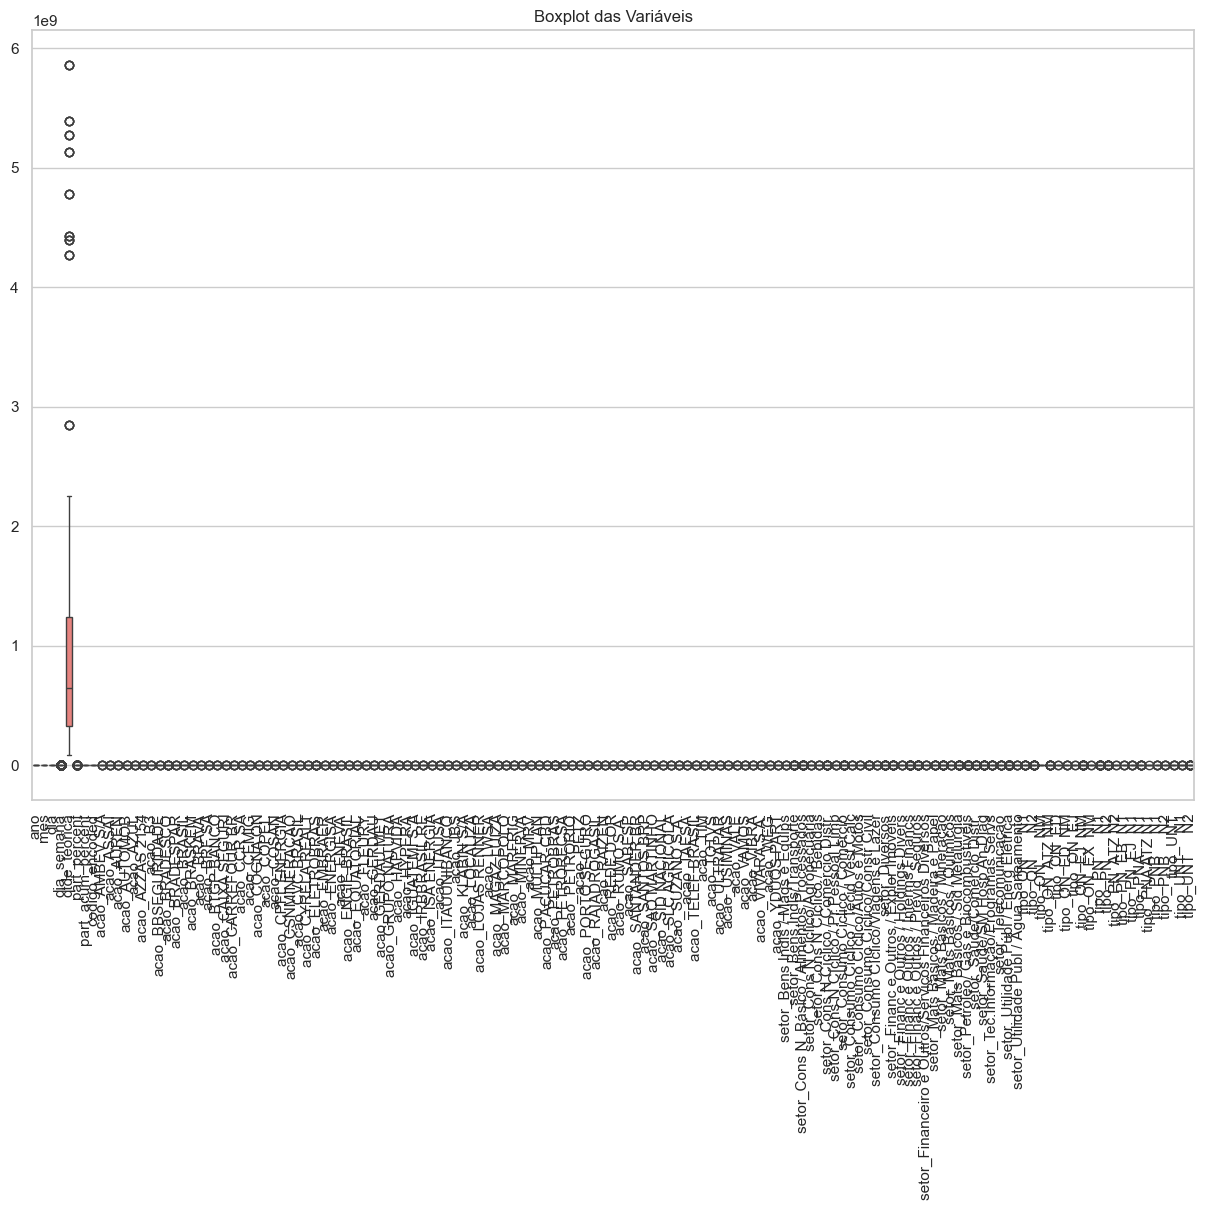

                                date     ano    mes         dia  dia_semana  \
count                            348   348.0  348.0  348.000000  348.000000   
mean   2025-03-23 05:59:59.999999744  2025.0    3.0   23.250000    2.750000   
min              2025-03-18 00:00:00  2025.0    3.0   18.000000    1.000000   
25%              2025-03-19 12:00:00  2025.0    3.0   19.500000    2.500000   
50%              2025-03-23 12:00:00  2025.0    3.0   23.500000    3.000000   
75%              2025-03-27 06:00:00  2025.0    3.0   27.250000    3.250000   
max              2025-03-28 00:00:00  2025.0    3.0   28.000000    4.000000   
std                              NaN     0.0    0.0    4.329129    1.091294   

                                date  qtde_teorica  part_percent  \
count                            348  3.480000e+02    348.000000   
mean   2025-03-23 05:59:59.999999744  1.137165e+09      1.149425   
min              2025-03-18 00:00:00  8.183824e+07      0.006000   
25%             

In [10]:
# celula 10
# Carregar e pré-processar os dados
file_path_pattern = '../data_pipeline/bovespa/*.csv'
data = load_data(file_path_pattern)
data = preprocess_data(data)

# Visualizar a distribuição dos dados com boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.title('Boxplot das Variáveis')
plt.show()
# criar um print do resultado dos campos que estavamos usando até  agora
print(data.describe())
print(data.info())

In [426]:
# Celula para limpeza inicial dos dados
# Remover duplicatas e resetar o índice
data = data.drop_duplicates().reset_index(drop=True)
print("Dados após remoção de duplicatas e reset do índice:", data.head())


Dados após remoção de duplicatas e reset do índice:         date   ano  mes  dia  dia_semana       date codigo  qtde_teorica  \
0 2025-03-18  2025    3   18           1 2025-03-18  WEGE3  1.243178e+09   
1 2025-03-18  2025    3   18           1 2025-03-18  EMBR3  7.346318e+08   
2 2025-03-18  2025    3   18           1 2025-03-18  POMO4  6.663784e+08   
3 2025-03-18  2025    3   18           1 2025-03-18  AZUL4  3.268720e+08   
4 2025-03-18  2025    3   18           1 2025-03-18  CCRO3  9.919209e+08   

   part_percent  part_acum_percent  ...  tipo_PN  ATZ N2  tipo_PN  EB  N1  \
0         2.819              2.819  ...            False            False   
1         2.706              2.925  ...            False            False   
2         0.219              2.925  ...            False            False   
3         0.059              2.227  ...            False            False   
4         0.571              2.227  ...            False            False   

   tipo_PN  EJ  N1  tipo_PNA

In [12]:
import pandas as pd
import numpy as np

# Definição da função remove_outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Supondo que 'data' é seu DataFrame
# Remover possíveis duplicatas de índices
data = data.reset_index(drop=True)

# Aplicar remoção de outliers para cada coluna numérica
for column in data.select_dtypes(include=[np.number]).columns:
    data = remove_outliers(data, column)

# Resetar o índice após remoção de outliers para manter a consistência
data = data.reset_index(drop=True)

print("Dados após a remoção de outliers:", data.head())
print("Colunas disponíveis após a remoção de outliers:", data.columns)


Dados após a remoção de outliers:         date   ano  mes  dia  dia_semana codigo  qtde_teorica  part_percent  \
0 2025-03-20  2025    3   20           3  POMO4  6.663784e+08         0.221   
1 2025-03-20  2025    3   20           3  AZUL4  3.268720e+08         0.058   
2 2025-03-20  2025    3   20           3  CCRO3  9.919209e+08         0.563   
3 2025-03-20  2025    3   20           3  RAIL3  1.216914e+09         1.041   
4 2025-03-20  2025    3   20           3  STBP3  8.557126e+08         0.538   

   part_acum_percent  codigo_encoded  ...  tipo_PN  ATZ N2  tipo_PN  EB  N1  \
0              2.958            60.0  ...            False            False   
1              2.200             5.0  ...            False            False   
2              2.200            18.0  ...            False            False   
3              2.200            64.0  ...            False            False   
4              2.200            73.0  ...            False            False   

   tipo_PN  EJ  

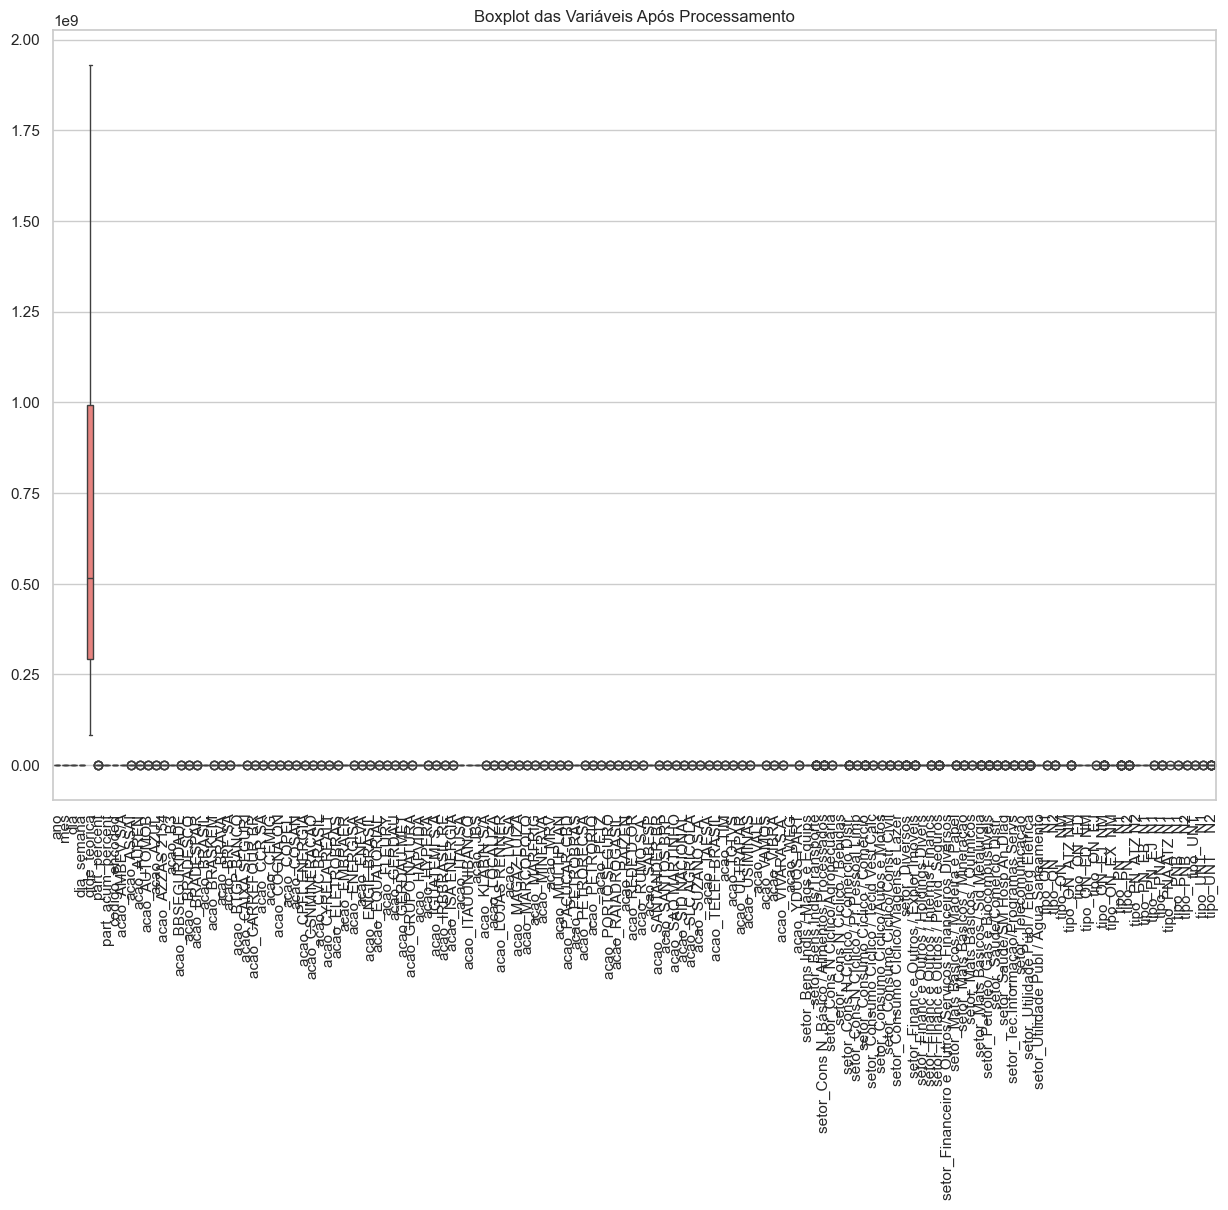

In [13]:
# Visualizar a distribuição dos dados com boxplots após limpeza e remoção de outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.title('Boxplot das Variáveis Após Processamento')
plt.show()


In [37]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import pandas as pd

def train_and_evaluate_models(X, y, models, dates, codes):
    results_list = []
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    test_dates = dates.iloc[X_test.index]
    test_codes = codes.iloc[X_test.index]

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)

        for i in range(len(y_pred)):
            results = {
                'Modelo': model_name,
                'Date': test_dates.iloc[i],
                'Codigo': test_codes.iloc[i],
                'Y_Predicted': y_pred[i],
                'Y_True': y_test.iloc[i],
                'MSE': mse,
                'R²': r2,
                'MAE': mae,
                'MAPE': mape
            }
            results_list.append(results)
    
    return pd.DataFrame(results_list)

# Define models
models = {
    'linear': LinearRegression(),
    'ridge': Ridge(alpha=1.0),
    'lasso': Lasso(alpha=0.1),
    'decision_tree': DecisionTreeRegressor(random_state=42),
    'xgboost': XGBRegressor(random_state=42)
}

# Prepare data
dates = data['date']  # Garantindo que 'date' está disponível
codes = data['codigo']  # Garantindo que 'codigo' está disponível
X = data.drop(['part_percent', 'date', 'codigo'], axis=1)
y = data['part_percent']

# Get results
results_df = train_and_evaluate_models(X, y, models, dates, codes)

# Reordenar as colunas para que 'Modelo' venha após 'Date'
columns_order = ['Date', 'Modelo', 'Codigo', 'Y_Predicted', 'Y_True', 'MSE', 'R²', 'MAE', 'MAPE']
results_df = results_df[columns_order]

# Salvar os resultados em um arquivo CSV
output_path = 'C:/Users/vfanj/Documents/FIAP_POS_ML/Fase03_Tech_Challenge/bovespa-data-analysis/bovespa-data-analysis/resultados/model_results.csv'
results_df.to_csv(output_path, index=False)
print(f"Resultados salvos em: {output_path}")


c:\Users\vfanj\Documents\FIAP_POS_ML\Fase03_Tech_Challenge\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.06831e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Resultados salvos em: C:/Users/vfanj/Documents/FIAP_POS_ML/Fase03_Tech_Challenge/bovespa-data-analysis/bovespa-data-analysis/resultados/model_results.csv


In [32]:
# Ajuste de hiperparâmetros do XGBoost
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

# Criar o modelo XGBoost
xgb_model = XGBRegressor(random_state=42)

# Dividir os dados, removendo 'date' e 'codigo' para o treinamento do modelo
X = data.drop(columns=['part_percent', 'date', 'codigo'])  # Excluir 'date' e 'codigo' da modelagem
y = data['part_percent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Guardar os códigos de ações e as datas correspondentes para os dados de teste
test_codes = data.loc[X_test.index, 'codigo']  # Usar índice para buscar 'codigo'
test_dates = data.loc[X_test.index, 'date']  # Usar índice para buscar 'date'

# Criar o GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Ajustar o GridSearchCV aos dados
grid_search.fit(X_train, y_train)

# Melhor combinação de hiperparâmetros
best_params = grid_search.best_params_
print(f"Melhores hiperparâmetros: {best_params}")

# Treinar o modelo com os melhores hiperparâmetros encontrados
best_xgb_model = XGBRegressor(**best_params, random_state=42)
best_xgb_model.fit(X_train, y_train)

# Fazer predições no conjunto de teste
y_pred = best_xgb_model.predict(X_test)

# Avaliar o modelo ajustado
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Criar o DataFrame de resultados
results_df = pd.DataFrame({
    'Modelo': ['xgboost'] * len(y_test),
    'Date': test_dates.values,
    'Codigo': test_codes.values,
    'Y_Predicted': y_pred,
    'Y_True': y_test.values,
    'MSE': [mse] * len(y_test),
    'R²': [r2] * len(y_test),
    'MAE': [mae] * len(y_test),
    'MAPE': [mape] * len(y_test)
})

# Exibir os resultados
print(results_df)

# Salvar os resultados em um arquivo CSV
output_path = 'C:/Users/vfanj/Documents/FIAP_POS_ML/Fase03_Tech_Challenge/bovespa-data-analysis/bovespa-data-analysis/resultados/model_results.csv'
results_df.to_csv(output_path, index=False)
print(f"Resultados salvos em: {output_path}")

Melhores hiperparâmetros: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300}
     Modelo       Date  Codigo  Y_Predicted  Y_True       MSE        R²  \
0   xgboost 2025-03-20   ASAI3     0.515111   0.489  0.000679  0.996741   
1   xgboost 2025-03-28   RDOR3     1.544116   1.535  0.000679  0.996741   
2   xgboost 2025-03-20   ENEV3     1.086900   1.163  0.000679  0.996741   
3   xgboost 2025-03-28   RAIZ4     0.111727   0.107  0.000679  0.996741   
4   xgboost 2025-03-27   CSAN3     0.428154   0.417  0.000679  0.996741   
5   xgboost 2025-03-27   BRKM5     0.132090   0.147  0.000679  0.996741   
6   xgboost 2025-03-20   LREN3     0.573339   0.612  0.000679  0.996741   
7   xgboost 2025-03-27   LREN3     0.623442   0.624  0.000679  0.996741   
8   xgboost 2025-03-27   STBP3     0.538124   0.534  0.000679  0.996741   
9   xgboost 2025-03-28   CCRO3     0.568127   0.558  0.000679  0.996741   
10  xgboost 2025-03-28   BRKM5     0.131589   0.146  0.000679  0.996741   
11  xgboost 20